In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import names
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the Data

In [2]:
df = pd.read_csv("Diabetes.csv")
df.shape

(768, 9)

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
dfx = df.iloc[:, :-1]
df.head(2) #independent

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


## Check if imbalanced

<Axes: xlabel='Outcome', ylabel='count'>

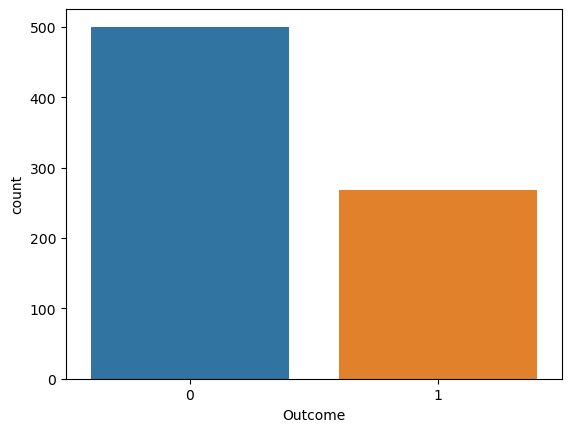

In [37]:
sns.countplot(x=df['Outcome'], data=df)

In [36]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Scaling them all - to make it in a same scale 

In [77]:
# MinMaxScaler = (max - min) / max = all values b/w 0 & 1

In [79]:
#retain data pattern but changes value

In [9]:
scaled_df = pd.DataFrame(MinMaxScaler().fit_transform(dfx))
scaled_df.columns = dfx.columns
scaled_df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.0,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.0,0.396423,0.116567,0.166667


In [11]:
scaled_df.describe().T #min=0, max=1

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,0.226180,0.198210,0.0,0.058824,0.176471,0.352941,1.0
Glucose,768.0,0.607510,0.160666,0.0,0.497487,0.587940,0.704774,1.0
BloodPressure,768.0,0.566438,0.158654,0.0,0.508197,0.590164,0.655738,1.0
SkinThickness,768.0,0.207439,0.161134,0.0,0.000000,0.232323,0.323232,1.0
Insulin,768.0,0.094326,0.136222,0.0,0.000000,0.036052,0.150414,1.0
BMI,768.0,0.476790,0.117499,0.0,0.406855,0.476900,0.545455,1.0
DiabetesPedigreeFunction,768.0,0.168179,0.141473,0.0,0.070773,0.125747,0.234095,1.0
Age,768.0,0.204015,0.196004,0.0,0.050000,0.133333,0.333333,1.0


In [12]:
y = df['Outcome']
y[:5] #target

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
# Volatile...impacted by outliers greatly

### Check Outliers

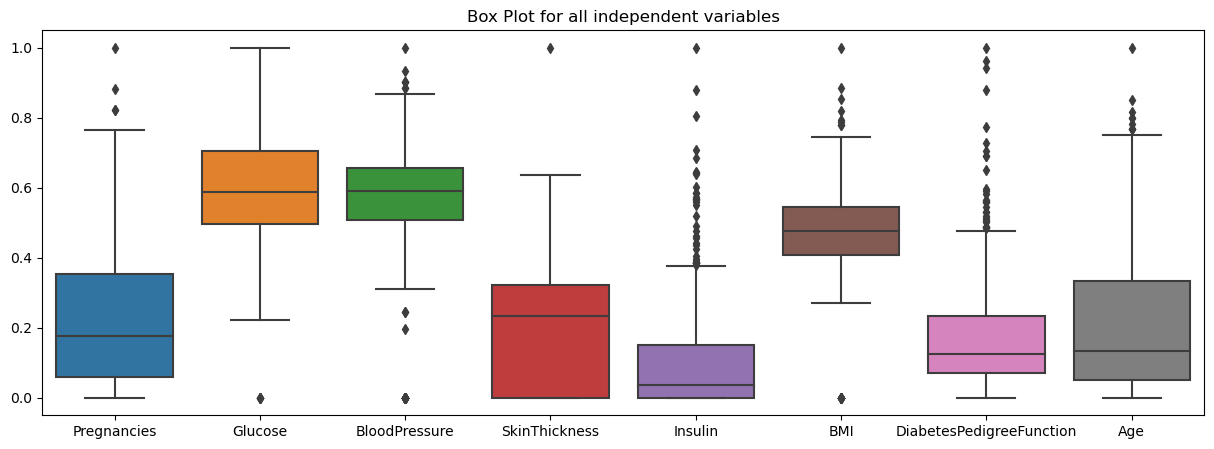

In [44]:
plt.figure(figsize=(15, 5))
plt.title("Box Plot for all independent variables")
sns.boxplot(data = scaled_df);

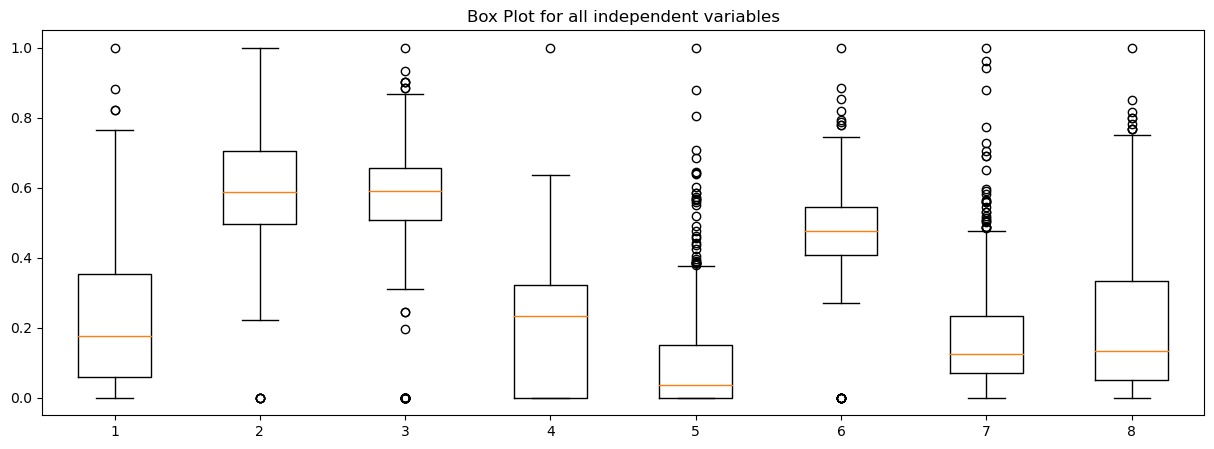

In [45]:
plt.figure(figsize=(15, 5))
plt.title("Box Plot for all independent variables")
plt.boxplot(scaled_df);

In [17]:
# Doing with outliers then without and check

In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Train Test Split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, shuffle=True)

In [65]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


## Building Model

In [66]:
model = logreg()
model.fit(x_train, y_train)

LogisticRegression()

In [67]:
y_pred = model.predict(x_test)

In [68]:
final_outcome = pd.DataFrame({"Actual Data" : y_test, "Predicted Data":y_pred})
final_outcome[:,10]

InvalidIndexError: (slice(None, None, None), 10)

In [69]:
cm = confusion_matrix(y_test, y_pred)

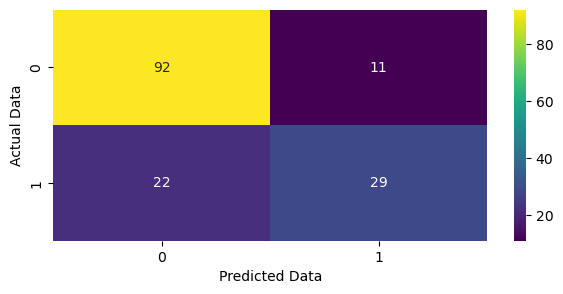

In [70]:
plt.figure(figsize=(7,3))
sns.heatmap(cm, annot=True, cmap='viridis')
plt.xlabel("Predicted Data")
plt.ylabel("Actual Data");

In [71]:
clf_re = classification_report(y_test, y_pred)
print(clf_re)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       103
           1       0.72      0.57      0.64        51

    accuracy                           0.79       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



## Reciever Operating Characterstics Curve (ROC)

In [72]:
y_probs = model.predict_proba(x_test)[:, 1]

In [73]:
fpr, tpr, threshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

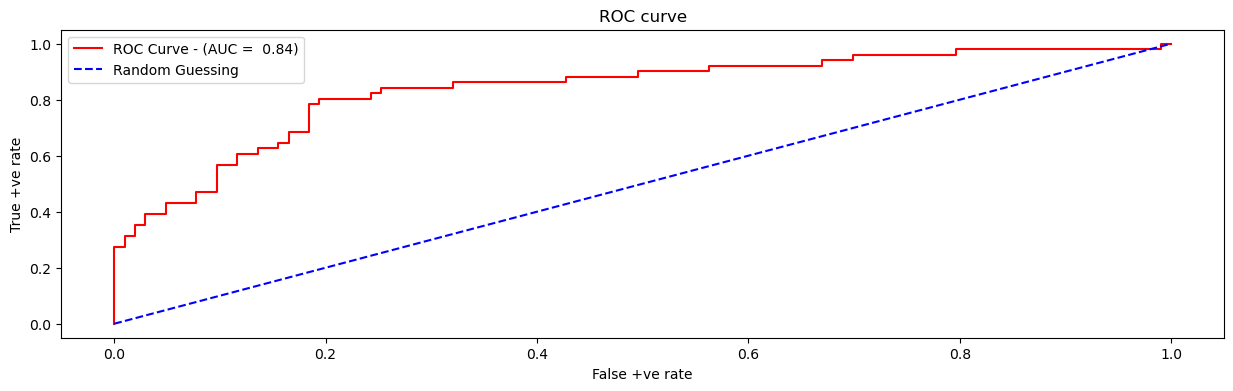

In [74]:
plt.figure(figsize=(15, 4))
plt.title("ROC curve")
plt.plot(fpr, tpr, 'Red', label=f"ROC Curve - (AUC = {roc_auc: .2f})")
plt.plot([0,1], [0,1], "b--", label="Random Guessing")
plt.xlabel('False +ve rate')
plt.ylabel('True +ve rate')
plt.legend(loc = "best");

# Treating Outliers - At Insulin

In [46]:
scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [47]:
# Insulin has most ouliers - so treating it

In [48]:
scaled_df['Insulin'].describe()

count    768.000000
mean       0.094326
std        0.136222
min        0.000000
25%        0.000000
50%        0.036052
75%        0.150414
max        1.000000
Name: Insulin, dtype: float64

In [49]:
q1 = scaled_df['Insulin'].describe()[4]
q2 = scaled_df['Insulin'].describe()[5]
q3 = scaled_df['Insulin'].describe()[6]
print(q1,q2,q3)

0.0 0.03605200945626477 0.15041371158392436


In [50]:
iqr = q3-q1

In [55]:
# upper & lower thres 
uw = q3 + (1.5 * iqr)
lw = q1 - (1.5 * iqr)
print(uw, lw)

0.3760342789598109 -0.22562056737588654


In [54]:
# greater than 0.37 & less than -0.22 is outlier

In [59]:
scaled_df[scaled_df['Insulin']>uw]['Insulin'].count() #only+ve outliers

34

In [57]:
scaled_df[scaled_df['Insulin']<lw]['Insulin'].count()

0

<Axes: >

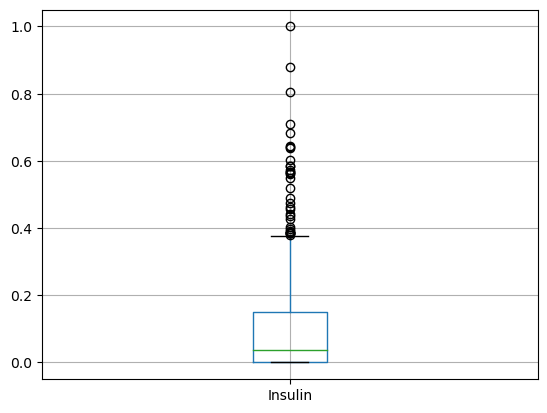

In [58]:
scaled_df.boxplot('Insulin')

In [62]:
#uw to be replaced with oultier
scaled_df['Insulin'] = np.where(scaled_df['Insulin'] > uw, uw, scaled_df['Insulin'])
scaled_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.087060,0.476790,0.168179,0.204015
std,0.198210,0.160666,0.158654,0.161134,0.110610,0.117499,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,0.376034,1.000000,1.000000,1.000000


<Axes: >

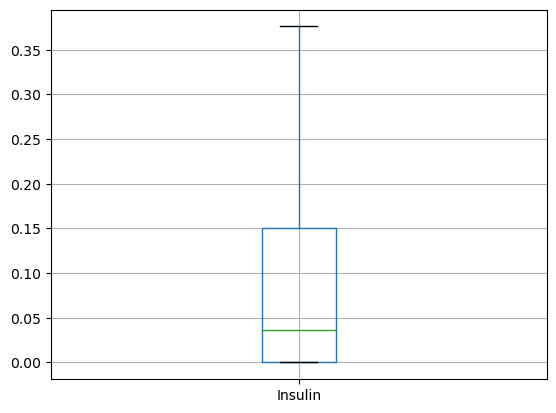

In [63]:
scaled_df.boxplot('Insulin')